<a href="https://colab.research.google.com/github/ReJackTion/data_segmentation/blob/main/Mall_Customer_Market_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing dataset

Source of the datasets:
https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import files

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [2]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rejacktion","key":"d220aa203f222a910326083ae50ae9b8"}'}

In [3]:
!mkdir ~/.kaggle #make a new folder
!cp /content/kaggle.json ~/.kaggle/ #copy file to that folder
!chmod 600 ~/.kaggle/kaggle.json #to allow read and write the file

In [5]:
!kaggle datasets download -d vjchoudhary7/customer-segmentation-tutorial-in-python

  0% 0.00/1.55k [00:00<?, ?B/s]
100% 1.55k/1.55k [00:00<00:00, 1.41MB/s]


In [6]:
!unzip customer-segmentation-tutorial-in-python.zip

Archive:  customer-segmentation-tutorial-in-python.zip
  inflating: Mall_Customers.csv      


In [8]:
data = pd.read_csv('/content/Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# Preprocessing

In [9]:
data.drop('CustomerID', axis=1, inplace=True)

In [10]:
encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender'])

gender_mappings = {index: label for index, label in enumerate(encoder.classes_)}
gender_mappings

{0: 'Female', 1: 'Male'}

In [11]:
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [12]:
scaled_data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,-0.886405,-0.276302,2.268791,1.118061
196,-0.886405,0.441365,2.497807,-0.861839
197,1.128152,-0.491602,2.497807,0.923953
198,1.128152,-0.491602,2.917671,-1.250054


# K-means Clustering
We will use elbow method to find the optimal number of clusters.

In [13]:
max_clusters = 50
kmeans_tests = [KMeans(n_clusters=i, n_init=10) for i in range(1, max_clusters)]
inertias = [kmeans_tests[i].fit(scaled_data).inertia_ for i in range(len(kmeans_tests))]

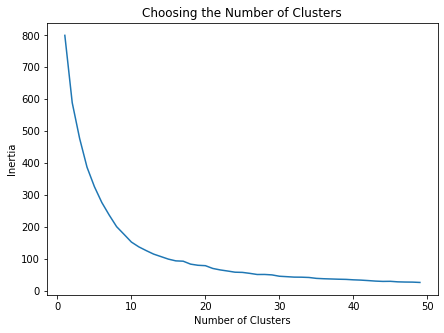

In [14]:
plt.figure(figsize=(7, 5))
plt.plot(range(1, max_clusters), inertias)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Choosing the Number of Clusters")
plt.show()

We can see that after about 10 clusters the inertia is not reducing significantly. We can conclude that perhaps 10 clusters is the optimal number of clusters.

In [15]:
kmeans = KMeans(n_clusters=10, n_init=10)
kmeans.fit(scaled_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [35]:
kmeans_pred = kmeans.predict(scaled_data)
kmeans_pred

array([9, 9, 1, 3, 1, 3, 1, 3, 7, 3, 7, 3, 4, 3, 7, 9, 1, 9, 7, 3, 7, 9,
       4, 9, 4, 9, 4, 9, 4, 3, 7, 3, 7, 9, 4, 3, 4, 3, 1, 3, 4, 9, 7, 1,
       4, 3, 4, 1, 1, 1, 4, 9, 1, 5, 4, 7, 4, 5, 1, 5, 5, 9, 4, 4, 5, 9,
       4, 4, 9, 1, 5, 4, 4, 4, 5, 9, 4, 9, 1, 4, 5, 9, 5, 4, 1, 5, 4, 1,
       1, 4, 4, 9, 5, 1, 1, 9, 4, 1, 5, 9, 1, 4, 5, 9, 5, 1, 4, 5, 5, 5,
       5, 1, 1, 9, 1, 1, 4, 4, 4, 4, 9, 1, 1, 0, 1, 6, 2, 0, 2, 0, 2, 0,
       1, 6, 2, 6, 8, 0, 2, 6, 8, 0, 1, 6, 2, 0, 2, 6, 8, 0, 2, 0, 8, 6,
       8, 6, 2, 6, 2, 6, 8, 6, 2, 6, 2, 6, 2, 6, 8, 0, 2, 0, 2, 0, 8, 6,
       2, 0, 2, 0, 8, 6, 2, 6, 8, 0, 8, 0, 8, 6, 8, 6, 2, 6, 8, 6, 8, 0,
       2, 0], dtype=int32)

# Hierarchical Agglomerative Clustering

I have tried different linkage but seems like ward performs the best for me.

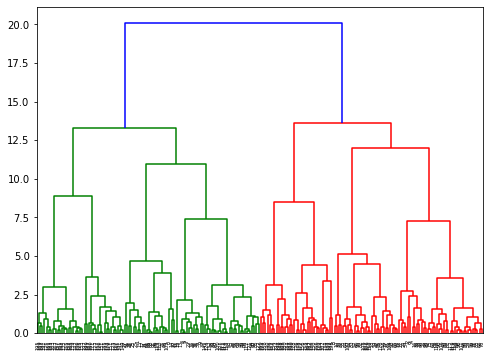

In [32]:
plt.figure(figsize=(8, 6))
#linked = linkage(scaled_data, 'single')
#linked = linkage(scaled_data, 'complete')
#linked = linkage(scaled_data, 'average')
linked = linkage(scaled_data, 'ward')
dendrogram(
    linked, 
    orientation='top', 
    distance_sort='ascending',
    show_leaf_counts=False)
plt.show()

As K-Means Clustering above suggest optimal number of cluster is 10, let's specify 6.25 as the cut threshold to make it 10 clusters.

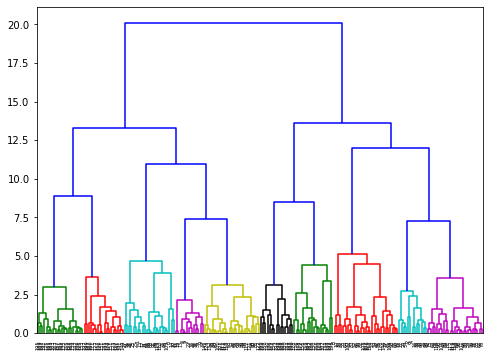

In [34]:
plt.figure(figsize=(8, 6))
linked = linkage(scaled_data, 'ward')
dendrogram(
    linked, 
    orientation='top', 
    distance_sort='ascending',
    show_leaf_counts=False,
    color_threshold=6.25)
plt.show()

The clusters seems to be quite evenly far from each other so they looks fine for me. Now lets get the prediction as well.

In [50]:
agglo = AgglomerativeClustering(n_clusters=10, linkage='ward')
agglo_pred = agglo.fit_predict(scaled_data)
agglo_pred

array([2, 2, 9, 8, 9, 8, 9, 8, 0, 8, 0, 8, 9, 8, 2, 2, 9, 2, 0, 8, 2, 2,
       9, 2, 9, 2, 9, 2, 9, 8, 0, 8, 0, 2, 9, 8, 9, 8, 9, 8, 3, 2, 0, 4,
       9, 8, 3, 4, 4, 4, 3, 2, 4, 0, 3, 0, 3, 0, 4, 0, 0, 2, 3, 3, 0, 2,
       3, 3, 2, 4, 0, 3, 3, 3, 0, 2, 3, 0, 4, 3, 0, 0, 0, 3, 4, 0, 3, 4,
       4, 3, 3, 2, 0, 4, 4, 2, 3, 4, 0, 2, 4, 3, 0, 2, 0, 4, 3, 0, 0, 0,
       0, 4, 4, 2, 4, 4, 3, 3, 3, 3, 2, 4, 4, 5, 4, 6, 0, 5, 1, 5, 1, 5,
       4, 6, 1, 6, 7, 5, 1, 6, 7, 5, 4, 6, 1, 5, 0, 6, 7, 5, 1, 5, 7, 6,
       7, 6, 1, 6, 1, 6, 7, 6, 1, 6, 1, 6, 1, 6, 7, 5, 1, 5, 1, 5, 7, 6,
       1, 5, 1, 5, 7, 6, 1, 6, 7, 5, 7, 5, 7, 6, 7, 6, 1, 6, 7, 6, 7, 5,
       1, 5])

# PCA

There is 4 features in the dataset but the problem is that we cannot plot 4D graph. There for we will perform PCA to reduce the data dimention into 2D. 

In [39]:
pca = PCA(n_components=2)
reduced_data = pd.DataFrame(pca.fit_transform(scaled_data), columns=['PC1', 'PC2'])
reduced_data

,PC1,PC2
0,-0.406383,-0.520714
1,-1.427673,-0.367310
2,0.050761,-1.894068
3,-1.694513,-1.631908
4,-0.313108,-1.810483
...,...,...
195,-1.179572,1.324568
196,0.672751,1.221061
197,-0.723719,2.765010
198,0.767096,2.861930


In [40]:
kmeans.cluster_centers_

array([[ 1.12815215, -0.39989994,  1.01344075,  1.26040667],
       [-0.88640526, -0.74039302, -0.34835966, -0.27822119],
       [ 1.12815215,  0.04664835,  0.93858626, -1.40339942],
       [-0.88640526, -0.96084556, -1.33087991,  1.17778643],
       [-0.88640526,  0.98505218, -0.49907107, -0.30892551],
       [ 1.12815215,  1.51786549, -0.21434255, -0.02070483],
       [-0.88640526, -0.47793198,  0.97284787,  1.22158511],
       [ 1.12815215,  0.90386159, -1.25127871, -1.17672464],
       [-0.88640526,  0.41265847,  1.21277   , -1.11029664],
       [ 1.12815215, -1.00644982, -0.70842461,  0.45978231]])

In [41]:
reduced_centers = pca.transform(kmeans.cluster_centers_)
reduced_centers

array([[-0.88272588,  1.65431318],
       [-0.52376821, -0.77420203],
       [ 1.25473165,  1.27579377],
       [-1.6696024 , -1.35294268],
       [ 0.68517405, -1.07161389],
       [ 1.32399409,  0.38367246],
       [-1.38150389,  0.3644368 ],
       [ 1.70202056, -0.46549325],
       [ 0.83149037,  0.21501655],
       [-0.73953416,  0.31691197]])

In [43]:
kmeans_data = reduced_data.copy()
kmeans_data['cluster'] = kmeans_pred
kmeans_data

,PC1,PC2,cluster
0,-0.406383,-0.520714,9
1,-1.427673,-0.367310,9
2,0.050761,-1.894068,1
3,-1.694513,-1.631908,3
4,-0.313108,-1.810483,1
...,...,...,...
195,-1.179572,1.324568,6
196,0.672751,1.221061,8
197,-0.723719,2.765010,0
198,0.767096,2.861930,2


In [45]:
agglo_data = reduced_data.copy()
agglo_data['cluster'] = agglo_pred
agglo_data

,PC1,PC2,cluster
0,-0.406383,-0.520714,2
1,-1.427673,-0.367310,2
2,0.050761,-1.894068,9
3,-1.694513,-1.631908,8
4,-0.313108,-1.810483,9
...,...,...,...
195,-1.179572,1.324568,6
196,0.672751,1.221061,7
197,-0.723719,2.765010,5
198,0.767096,2.861930,1


# Data Visualization

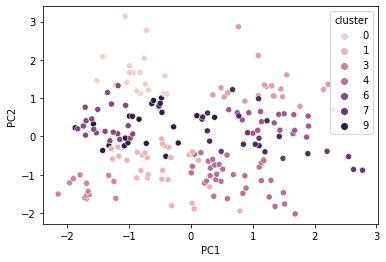

In [53]:
sns.scatterplot(x = kmeans_data["PC1"],
                y = kmeans_data["PC2"],
                hue = kmeans_data["cluster"])

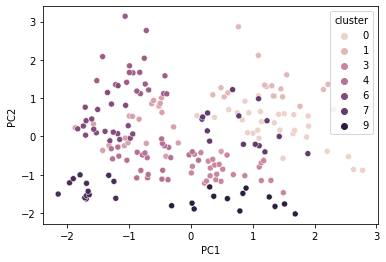

In [48]:
sns.scatterplot(x = agglo_data["PC1"],
                y = agglo_data["PC2"],
                hue = agglo_data["cluster"])

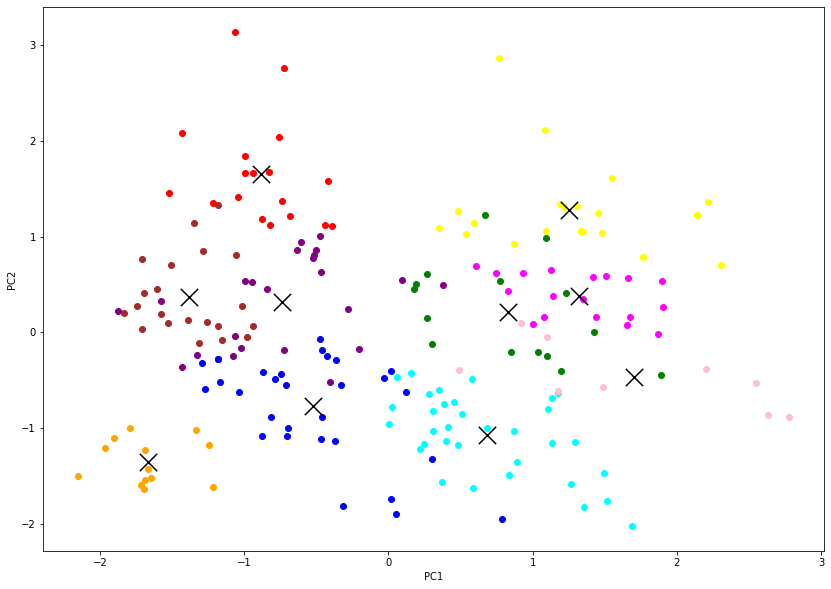

In [52]:
plt.figure(figsize=(14, 10))

plt.scatter(kmeans_data[kmeans_data['cluster'] == 0].loc[:, 'PC1'], kmeans_data[kmeans_data['cluster'] == 0].loc[:, 'PC2'], color='red')
plt.scatter(kmeans_data[kmeans_data['cluster'] == 1].loc[:, 'PC1'], kmeans_data[kmeans_data['cluster'] == 1].loc[:, 'PC2'], color='blue')
plt.scatter(kmeans_data[kmeans_data['cluster'] == 2].loc[:, 'PC1'], kmeans_data[kmeans_data['cluster'] == 2].loc[:, 'PC2'], color='yellow')
plt.scatter(kmeans_data[kmeans_data['cluster'] == 3].loc[:, 'PC1'], kmeans_data[kmeans_data['cluster'] == 3].loc[:, 'PC2'], color='orange')
plt.scatter(kmeans_data[kmeans_data['cluster'] == 4].loc[:, 'PC1'], kmeans_data[kmeans_data['cluster'] == 4].loc[:, 'PC2'], color='cyan')
plt.scatter(kmeans_data[kmeans_data['cluster'] == 5].loc[:, 'PC1'], kmeans_data[kmeans_data['cluster'] == 5].loc[:, 'PC2'], color='magenta')
plt.scatter(kmeans_data[kmeans_data['cluster'] == 6].loc[:, 'PC1'], kmeans_data[kmeans_data['cluster'] == 6].loc[:, 'PC2'], color='brown')
plt.scatter(kmeans_data[kmeans_data['cluster'] == 7].loc[:, 'PC1'], kmeans_data[kmeans_data['cluster'] == 7].loc[:, 'PC2'], color='pink')
plt.scatter(kmeans_data[kmeans_data['cluster'] == 8].loc[:, 'PC1'], kmeans_data[kmeans_data['cluster'] == 8].loc[:, 'PC2'], color='green')
plt.scatter(kmeans_data[kmeans_data['cluster'] == 9].loc[:, 'PC1'], kmeans_data[kmeans_data['cluster'] == 9].loc[:, 'PC2'], color='purple')

plt.scatter(reduced_centers[:, 0], reduced_centers[:, 1], color='black', marker='x', s=300)

plt.xlabel("PC1")
plt.ylabel("PC2")

plt.show()

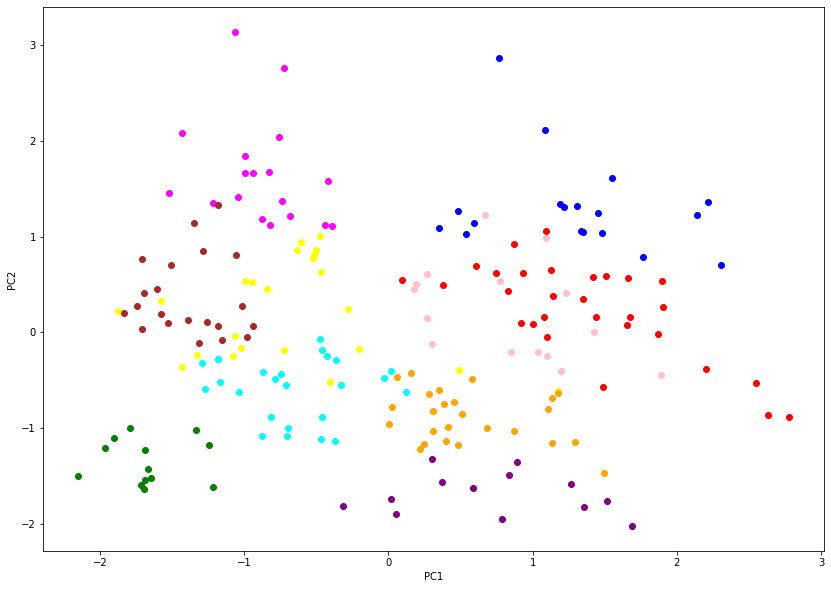

In [54]:
plt.figure(figsize=(14, 10))

plt.scatter(agglo_data[agglo_data['cluster'] == 0].loc[:, 'PC1'], agglo_data[agglo_data['cluster'] == 0].loc[:, 'PC2'], color='red')
plt.scatter(agglo_data[agglo_data['cluster'] == 1].loc[:, 'PC1'], agglo_data[agglo_data['cluster'] == 1].loc[:, 'PC2'], color='blue')
plt.scatter(agglo_data[agglo_data['cluster'] == 2].loc[:, 'PC1'], agglo_data[agglo_data['cluster'] == 2].loc[:, 'PC2'], color='yellow')
plt.scatter(agglo_data[agglo_data['cluster'] == 3].loc[:, 'PC1'], agglo_data[agglo_data['cluster'] == 3].loc[:, 'PC2'], color='orange')
plt.scatter(agglo_data[agglo_data['cluster'] == 4].loc[:, 'PC1'], agglo_data[agglo_data['cluster'] == 4].loc[:, 'PC2'], color='cyan')
plt.scatter(agglo_data[agglo_data['cluster'] == 5].loc[:, 'PC1'], agglo_data[agglo_data['cluster'] == 5].loc[:, 'PC2'], color='magenta')
plt.scatter(agglo_data[agglo_data['cluster'] == 6].loc[:, 'PC1'], agglo_data[agglo_data['cluster'] == 6].loc[:, 'PC2'], color='brown')
plt.scatter(agglo_data[agglo_data['cluster'] == 7].loc[:, 'PC1'], agglo_data[agglo_data['cluster'] == 7].loc[:, 'PC2'], color='pink')
plt.scatter(agglo_data[agglo_data['cluster'] == 8].loc[:, 'PC1'], agglo_data[agglo_data['cluster'] == 8].loc[:, 'PC2'], color='green')
plt.scatter(agglo_data[agglo_data['cluster'] == 9].loc[:, 'PC1'], agglo_data[agglo_data['cluster'] == 9].loc[:, 'PC2'], color='purple')

plt.xlabel("PC1")
plt.ylabel("PC2")

plt.show()